In [11]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import math
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from keras.utils import np_utils
import sklearn

In [2]:
y=pd.read_csv('allstate_labels_2007.csv',low_memory=False)
y=np.array(y['loan_status'])
X=pd.read_csv('allstate_filtered_loans_2007.csv',low_memory=False)
X=np.array(X)

In [3]:
X,y=shuffle(X,y,random_state=0)
X=tf.keras.utils.normalize(X,axis=1)
X_train_origin,X_test,y_train_origin,y_test=train_test_split(X,y,random_state=5,test_size=0.2)
X_train=X_train_origin
y_train=y_train_origin

In [5]:
smt = SMOTETomek(1)
X_train,y_train = smt.fit_resample(X_train_origin, y_train_origin)
y_train_encoding=np_utils.to_categorical(y_train)
y_test_encoding=np_utils.to_categorical(y_test)

In [30]:
train_size=list(range(2,11,2))
train_size[:]=[x/10 for x in train_size]
errorate_train=[]
errorate_test=[]
FP_train=[]
FP_test=[]
train_time=[]
for n in train_size:
    X_train,y_train_encoding=shuffle(X_train,y_train_encoding,random_state=2)
    X_train_sub=X_train[:int(len(X_train)*n)]
    y_train_sub=y_train[:int(len(y_train)*n)]
    y_train_sub_encoding=y_train_encoding[:int(len(y_train_encoding)*n)]
    time_start=time.clock()
    model=Sequential()
    model.add(Dense(60,input_dim=37,activation=tf.nn.relu))
    model.add(Dense(60,activation=tf.nn.relu))
    model.add(Dense(2,activation=tf.nn.softmax))
    model.compile(optimizer='adam',loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history=model.fit(X_train_sub,y_train_sub_encoding,epochs=25,validation_data = (X_test, y_test_encoding))
    errorate_train.append(1-model.evaluate(X_train_sub,y_train_sub_encoding)[1])
    errorate_test.append(1-model.evaluate(X_test,y_test_encoding)[1])
    error_train=np.argmax(model.predict(X_train_sub),axis=1)-y_train_sub
    FP_train.append(Counter(error_train)[1]/Counter(y_train_sub)[0])
    error_test=np.argmax(model.predict(X_test),axis=1)-y_test
    FP_test.append(Counter(error_test)[1]/Counter(y_test)[0])
    train_time.append(time.clock()-time_start)


Train on 9904 samples, validate on 7730 samples
Epoch 1/25
9904/9904 [==============================] - 2s 154us/step - loss: 0.6841 - acc: 0.5511 - val_loss: 0.6979 - val_acc: 0.5589
Epoch 2/25
9904/9904 [==============================] - 1s 57us/step - loss: 0.6797 - acc: 0.5683 - val_loss: 0.6512 - val_acc: 0.6594
Epoch 3/25
9904/9904 [==============================] - 0s 50us/step - loss: 0.6782 - acc: 0.5776 - val_loss: 0.7060 - val_acc: 0.5560
Epoch 4/25
9904/9904 [==============================] - 0s 49us/step - loss: 0.6781 - acc: 0.5715 - val_loss: 0.6781 - val_acc: 0.6163
Epoch 5/25
9904/9904 [==============================] - 1s 67us/step - loss: 0.6777 - acc: 0.5717 - val_loss: 0.6466 - val_acc: 0.6961
Epoch 6/25
9904/9904 [==============================] - 1s 51us/step - loss: 0.6782 - acc: 0.5716 - val_loss: 0.6610 - val_acc: 0.6700
Epoch 7/25
9904/9904 [==============================] - 1s 54us/step - loss: 0.6777 - acc: 0.5736 - val_loss: 0.6734 - val_acc: 0.6480
Epoch 

49520/49520 [==============================] - 2s 34us/step - loss: 0.6574 - acc: 0.6079 - val_loss: 0.6314 - val_acc: 0.6110
Epoch 16/25
49520/49520 [==============================] - 2s 33us/step - loss: 0.6546 - acc: 0.6126 - val_loss: 0.7040 - val_acc: 0.4807
Epoch 17/25
49520/49520 [==============================] - 2s 33us/step - loss: 0.6536 - acc: 0.6134 - val_loss: 0.6299 - val_acc: 0.6279
Epoch 18/25
49520/49520 [==============================] - 2s 34us/step - loss: 0.6513 - acc: 0.6174 - val_loss: 0.6749 - val_acc: 0.5088
Epoch 19/25
49520/49520 [==============================] - 2s 33us/step - loss: 0.6526 - acc: 0.6136 - val_loss: 0.6123 - val_acc: 0.6292
Epoch 20/25
49520/49520 [==============================] - 2s 33us/step - loss: 0.6502 - acc: 0.6173 - val_loss: 0.6941 - val_acc: 0.4947
Epoch 21/25
49520/49520 [==============================] - 2s 33us/step - loss: 0.6506 - acc: 0.6170 - val_loss: 0.6280 - val_acc: 0.5979
Epoch 22/25
49520/49520 [=====================

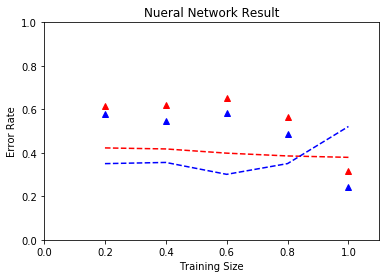

In [31]:
plt.plot(train_size,errorate_train,'r--',train_size,errorate_test,'b--',train_size,FP_train, 'r^', train_size,FP_test, 'b^')
plt.axis([0,1.1,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Training Size')
plt.title('Nueral Network Result')
plt.savefig('E:/Machine Learning/HW1/Bank/Bank_NN_Error.png')

In [35]:
errorate_test

[0.3503234152189356,
 0.3557567916743043,
 0.30103492886406324,
 0.350452781402124,
 0.5210866752756521]

In [36]:
FP_test

[0.577736890524379,
 0.5446182152713891,
 0.5850965961361545,
 0.48574057037718493,
 0.24379024839006438]

In [37]:
confusion_matrix(y_test,np.argmax(model.predict(X_test),axis=1))

array([[ 822,  265],
       [3763, 2880]], dtype=int64)

In [12]:
cohen_kappa_score(y_test,np.argmax(model.predict(X_test),axis=1))

0.0866388986873674

In [39]:
Precision=4269/(4269+482)
Precision

0.8985476741738582

In [40]:
recall=4269/(4269+2374)
recall

0.6426313412614783

In [42]:
train_time

[16.232506101718627,
 23.694013323040508,
 27.837120652451176,
 36.1749583408066,
 44.62373076743802]

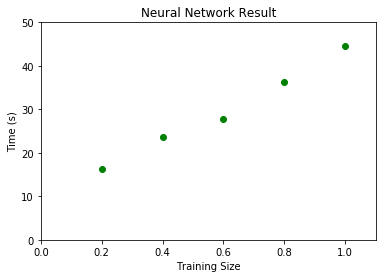

In [44]:
plt.plot(train_size,train_time,'go')
plt.axis([0,1.1,0,50])
plt.ylabel('Time (s)')
plt.xlabel('Training Size')
plt.title('Neural Network Result')
plt.savefig('E:/Machine Learning/HW1/Bank/Bank_NN_T.png')

In [45]:
acc=[1-x for x in history.history['acc']]
test_acc=[1-x for x in history.history['val_acc']]
epoch=list(range(1,26))

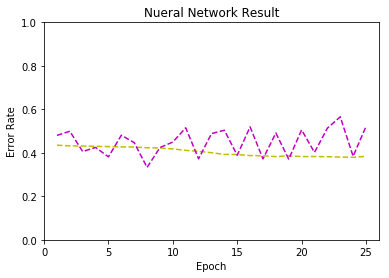

In [46]:
plt.plot(epoch,acc,'y--',epoch,test_acc,'m--')
plt.axis([0,26,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Epoch')
plt.title('Nueral Network Result')
plt.savefig('E:/Machine Learning/HW1/Bank/Bank_NNW_Epoch_Error.png')

In [5]:
from imblearn.under_sampling import RandomUnderSampler
res=RandomUnderSampler()
X_res,y_res=res.fit_resample(X_train_origin, y_train_origin)
y_res_encoding=np_utils.to_categorical(y_res)
y_test_encoding=np_utils.to_categorical(y_test)

In [8]:
    model=Sequential()
    model.add(Dense(60,input_dim=37,activation=tf.nn.relu))
    model.add(Dense(60,activation=tf.nn.relu))
    model.add(Dense(2,activation=tf.nn.softmax))
    model.compile(optimizer='adam',loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history=model.fit(X_res,y_res_encoding,epochs=50,validation_data = (X_test, y_test_encoding))
    errorate_train_res=1-model.evaluate(X_res,y_res_encoding)[1]
    errorate_test_res=1-model.evaluate(X_test,y_test_encoding)[1]
    error_train=np.argmax(model.predict(X_res),axis=1)-y_res
    FP_train_res=Counter(error_train)[1]/Counter(y_res)[0]
    error_test=np.argmax(model.predict(X_test),axis=1)-y_test
    FP_test_res=Counter(error_test)[1]/Counter(y_test)[0]

Train on 8672 samples, validate on 7730 samples
Epoch 1/50
8672/8672 [==============================] - 1s 79us/step - loss: 0.6892 - acc: 0.5411 - val_loss: 0.6383 - val_acc: 0.7334
Epoch 2/50
8672/8672 [==============================] - 0s 42us/step - loss: 0.6848 - acc: 0.5558 - val_loss: 0.7088 - val_acc: 0.5233
Epoch 3/50
8672/8672 [==============================] - 0s 44us/step - loss: 0.6839 - acc: 0.5567 - val_loss: 0.6962 - val_acc: 0.5589
Epoch 4/50
8672/8672 [==============================] - 0s 42us/step - loss: 0.6844 - acc: 0.5520 - val_loss: 0.6547 - val_acc: 0.6596
Epoch 5/50
8672/8672 [==============================] - 0s 42us/step - loss: 0.6836 - acc: 0.5575 - val_loss: 0.6276 - val_acc: 0.7217
Epoch 6/50
8672/8672 [==============================] - 0s 43us/step - loss: 0.6830 - acc: 0.5552 - val_loss: 0.6699 - val_acc: 0.6492
Epoch 7/50
8672/8672 [==============================] - 0s 44us/step - loss: 0.6835 - acc: 0.5558 - val_loss: 0.6855 - val_acc: 0.6072
Epoch 8

In [10]:
print(errorate_test_res,FP_test_res,errorate_train_res,FP_train_res)

0.32716688230768676 0.5869365225390984 0.435539667896679 0.5855627306273062
